In [43]:
import pandas as pd
import json

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

import matplotlib.pyplot as plt

In [11]:
file_path = "./output_data/virtual_rides.json"
virtual_rides_df = pd.read_json(file_path)

In [17]:
cols = [
    'activityId',
    'duration',
    'distance',
    'elevationGain',
    'avgSpeed',
    'avgHr',
    'avgPower',
    'avgBikeCadence',
    'aerobicTrainingEffect',
    'normPower',
    'activityTrainingLoad',
    'trainingEffectLabel',
    'aerobicTrainingEffectMessage',
    'anaerobicTrainingEffectMessage',
    'hrTimeInZone_0',
    'hrTimeInZone_1',
    'hrTimeInZone_2',
    'hrTimeInZone_3',
    'hrTimeInZone_4',
    'hrTimeInZone_5',
    'powerTimeInZone_0',
    'powerTimeInZone_1',
    'powerTimeInZone_2',
    'powerTimeInZone_3',
    'powerTimeInZone_4',
    'powerTimeInZone_5',
    'powerTimeInZone_6',
    'powerTimeInZone_7',
    'vo2MaxValue'
]

In [18]:
rides_df_sel = virtual_rides_df[cols]

### Encode Variables

In [ ]:
encode_cols = [
    'trainingEffectLabel',
    'aerobicTrainingEffectMessage',
    'anaerobicTrainingEffectMessage'
]
rides_encoded_df = pd.get_dummies(rides_df_sel, columns=encode_cols)

In [26]:
rides_encoded_df_dropped = rides_encoded_df.dropna(axis = 0)

In [27]:
print(len(rides_encoded_df_dropped))
print(len(rides_encoded_df))

29
36


In [34]:
# Features und Zielvariable
X = rides_encoded_df_dropped.drop(columns=['activityId', 'vo2MaxValue'])  # Features
y = rides_encoded_df_dropped['vo2MaxValue']           # Zielvariable

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regressionsbaum erstellen
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Modell trainieren
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [35]:
# Vorhersagen treffen
y_pred = reg_tree.predict(X_test)

# MSE und RMSE berechnen
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 3.22
Root Mean Squared Error (RMSE): 1.80


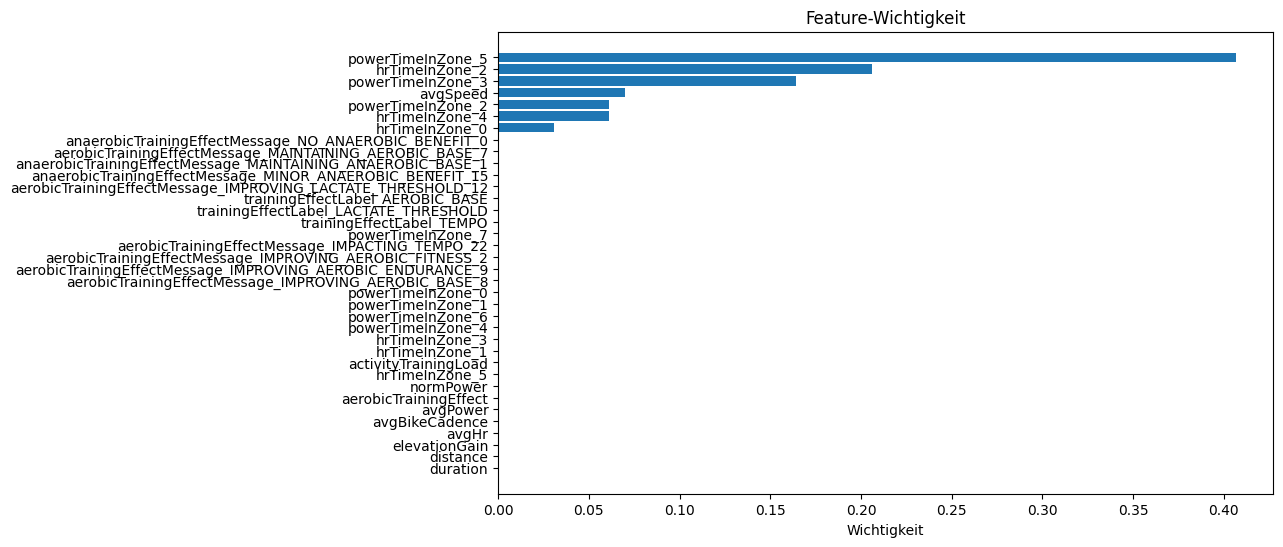

In [45]:
importances = reg_tree.feature_importances_  # Oder clf.feature_importances_ für Klassifikation

# Feature-Namen, falls vorhanden (falls es sich um ein DataFrame handelt)
feature_names = X.columns  # Bei einem DataFrame mit `X.columns` anpassen

# Indizes der Features sortieren
indices = np.argsort(importances)

# Visualisiere die Wichtigkeiten
plt.figure(figsize=(10, 6))
plt.title("Feature-Wichtigkeit")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel('Wichtigkeit')
plt.show()

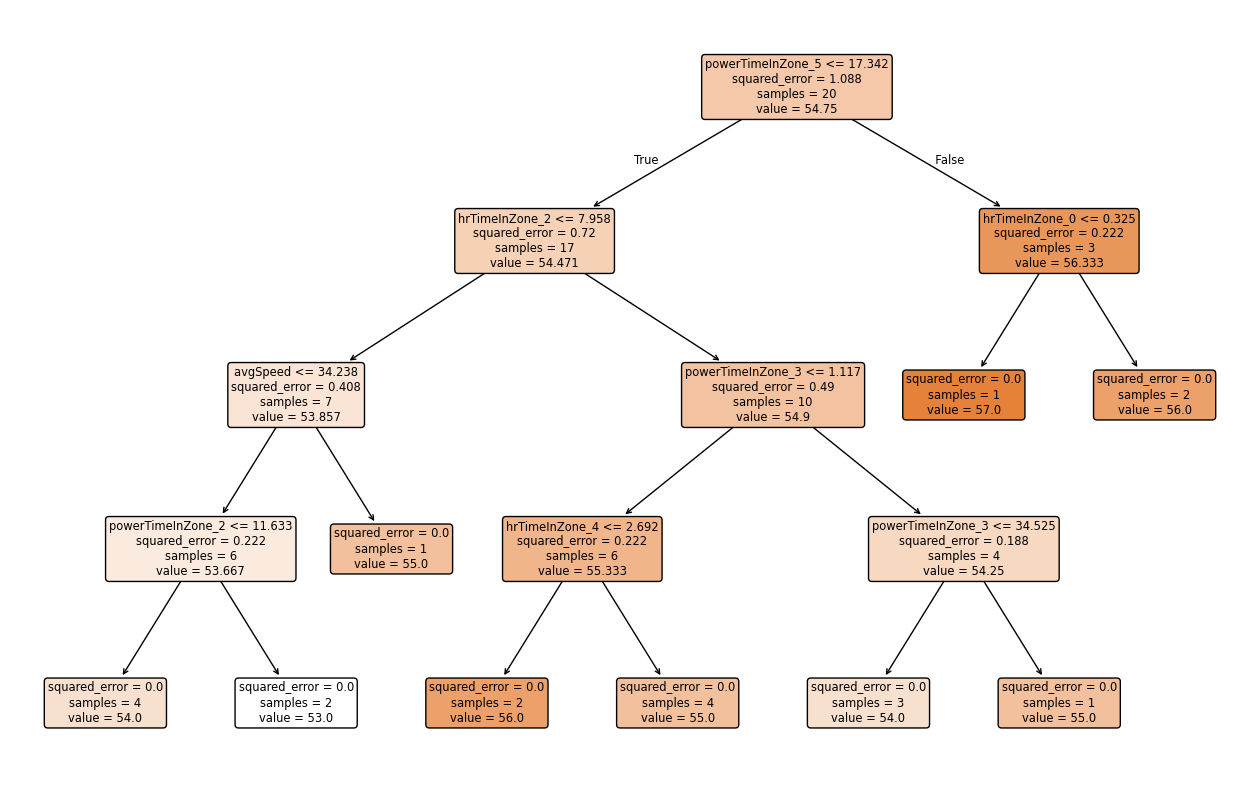

In [ ]:
plt.figure(figsize=(16, 10))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()